In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay

In [94]:
df = pd.read_csv("sentimentdataset.csv")
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [96]:
df.isnull().sum()

Unnamed: 0.1    0
Unnamed: 0      0
Text            0
Sentiment       0
Timestamp       0
User            0
Platform        0
Hashtags        0
Retweets        0
Likes           0
Country         0
Year            0
Month           0
Day             0
Hour            0
dtype: int64

In [97]:
df['Sentiment'].value_counts()

Sentiment
Positive           44
Joy                42
Excitement         32
Neutral            14
Contentment        14
                   ..
Adrenaline          1
Harmony             1
ArtisticBurst       1
Radiance            1
Elegance            1
Name: count, Length: 279, dtype: int64

C:\Users\Admin\AppData\Local\Temp\ipykernel_14772\1334498202.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=filtered_df["Sentiment"], palette="viridis", order=top_20_sentiments)


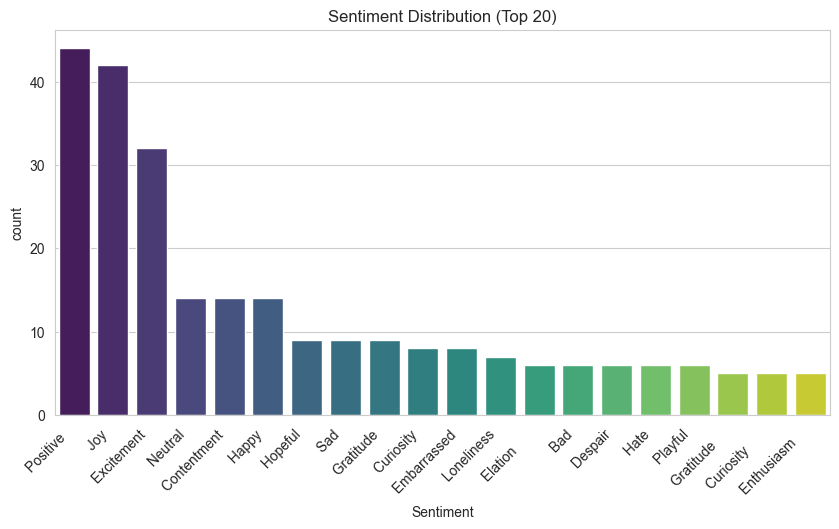

In [98]:
sns.set_style("whitegrid")
# Get the top 20 most used sentiments
top_20_sentiments = df["Sentiment"].value_counts().nlargest(20).index
filtered_df = df[df["Sentiment"].isin(top_20_sentiments)]

# Plot
sns.set_style("whitegrid")
plt.figure(figsize=(10, 5))

sns.countplot(x=filtered_df["Sentiment"], palette="viridis", order=top_20_sentiments)
plt.title("Sentiment Distribution (Top 20)")
plt.xticks(rotation=45, ha="right") 

plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14772\4256819892.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Platform"], palette="Blues")


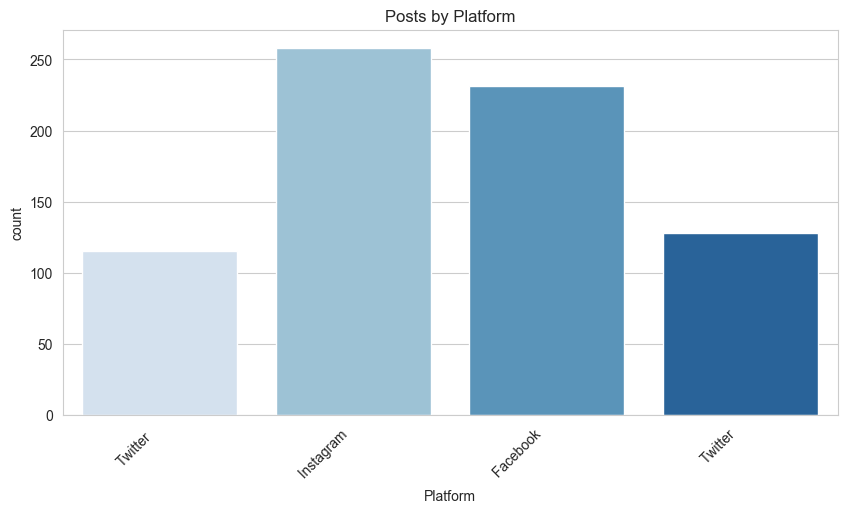

In [99]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df["Platform"], palette="Blues")
plt.title("Posts by Platform")
plt.xticks(rotation=45, ha="right")
plt.show()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14772\1657223533.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', ci=None)


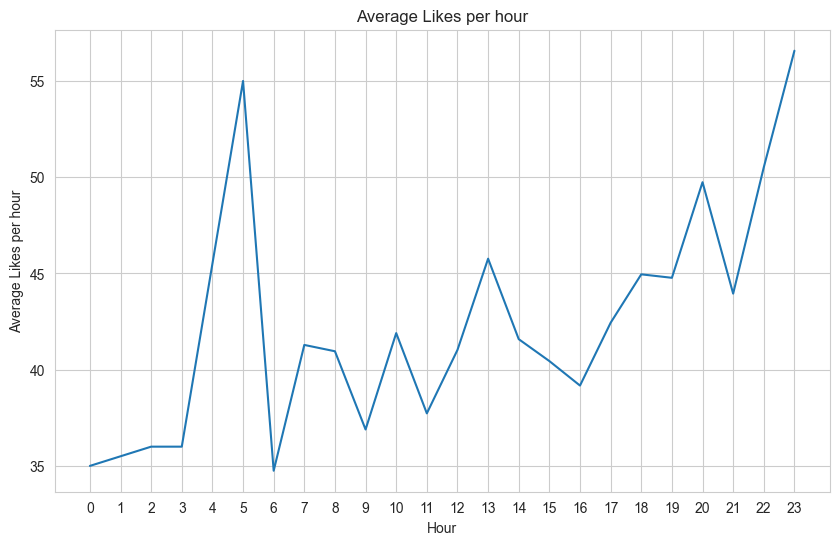

In [100]:
plt.figure(figsize=(10,6))
sns.lineplot(x=df['Hour'], y=df['Likes'], estimator='mean', ci=None)
plt.title("Average Likes per hour")
plt.xlabel("Hour")
plt.ylabel("Average Likes per hour")
plt.xticks(range(0, 24))
plt.show()

In [101]:
df["Timestamp"] = pd.to_datetime(df["Timestamp"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

In [102]:
df["Year"] = df["Timestamp"].dt.year
df["Month"] = df["Timestamp"].dt.month
df["Day"] = df["Timestamp"].dt.day
df["Hour"] = df["Timestamp"].dt.hour
print(df[["Timestamp", "Year", "Month", "Day", "Hour"]].head())

            Timestamp  Year  Month  Day  Hour
0 2023-01-15 12:30:00  2023      1   15    12
1 2023-01-15 08:45:00  2023      1   15     8
2 2023-01-15 15:45:00  2023      1   15    15
3 2023-01-15 18:20:00  2023      1   15    18
4 2023-01-15 19:55:00  2023      1   15    19


In [103]:
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r'http\S+', '', text)  # remove URLs
    text = re.sub(r'@\w+|#\w+', '', text)  # remove mentions and hashtags
    text = re.sub(r'[^A-Za-z\s]', '', text)  # remove special chars
    text = re.sub(r'\s+', ' ', text).strip()  # remove extra whitespace
    return text

df['Cleaned_Text'] = df['Text'].apply(clean_text)


In [104]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour,Cleaned_Text
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12,enjoying a beautiful day at the park
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8,traffic was terrible this morning
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15,just finished an amazing workout
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18,excited about the upcoming weekend getaway
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19,trying out a new recipe for dinner tonight


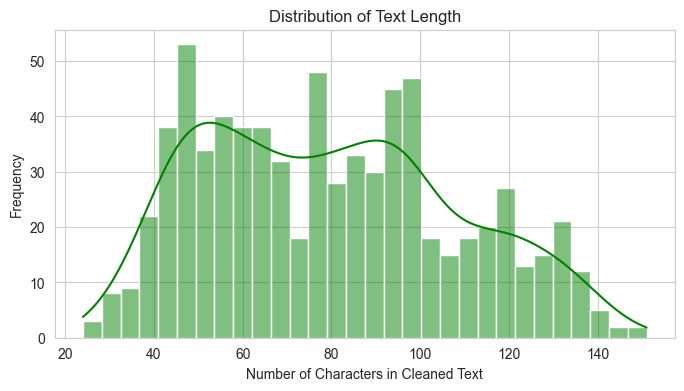

In [105]:
df['Text_Length'] = df['Cleaned_Text'].apply(len)
plt.figure(figsize=(8,4))
sns.histplot(df['Text_Length'], bins=30, kde=True, color='green')
plt.title("Distribution of Text Length")
plt.xlabel("Number of Characters in Cleaned Text")
plt.ylabel("Frequency")
plt.show()

In [106]:
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['Cleaned_Text'])
y = df['Sentiment']

In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [108]:
X_train

<585x2427 sparse matrix of type '<class 'numpy.float64'>'
	with 6621 stored elements in Compressed Sparse Row format>

In [109]:
X_test

<147x2427 sparse matrix of type '<class 'numpy.float64'>'
	with 1609 stored elements in Compressed Sparse Row format>

In [110]:
y_train

683               Sad 
250             Proud 
336     Calmness      
260         Curiosity 
439        Ruins      
            ...       
71       Confusion    
106      Kind         
270        Empathetic 
435        Exhaustion 
102      Bitter       
Name: Sentiment, Length: 585, dtype: object

In [111]:
y_test

604           Curiosity 
33            Positive  
300             Fearful 
457          Heartbreak 
634                 Joy 
             ...        
70         Calmness     
192         Jealousy    
328             Envious 
165     Loneliness      
135       Elation       
Name: Sentiment, Length: 147, dtype: object

In [112]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [113]:
y_pred = model.predict(X_test)
y_pred

array([' Positive  ', ' Positive  ', ' Excitement ', ' Joy ', ' Joy ',
       ' Joy ', ' Positive  ', ' Positive  ', ' Excitement ', ' Joy ',
       ' Excitement ', ' Excitement ', ' Positive  ', ' Positive  ',
       ' Acceptance      ', ' Positive  ', ' Excitement ', ' Joy ',
       ' Joy ', ' Joy ', ' Joy ', ' Joy ', ' Joy ', ' Positive  ',
       ' Positive  ', ' Joy ', ' Joy ', ' Joy ', ' Positive  ',
       ' Positive  ', ' Positive  ', ' Excitement ', ' Positive  ',
       ' Positive  ', ' Positive  ', ' Joy ', ' Positive  ', ' Joy ',
       ' Joy ', ' Positive  ', ' Positive  ', ' Joy ', ' Excitement ',
       ' Positive  ', ' Joy ', ' Joy ', ' Joy ', ' Joy ', ' Positive  ',
       ' Joy ', ' Joy ', ' Excitement ', ' Joy ', ' Positive  ', ' Joy ',
       ' Joy ', ' Excitement ', ' Positive  ', ' Joy ', ' Joy ',
       ' Excitement ', ' Joy ', ' Positive  ', ' Positive  ', ' Joy ',
       ' Joy ', ' Joy ', ' Joy ', ' Positive  ', ' Positive  ',
       ' Excitement ', ' Positive 

In [114]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.12244897959183673


In [115]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
                         precision    recall  f1-score   support

         Acceptance          0.00      0.00      0.00         2
      Acceptance             0.00      0.00      0.00         0
           Admiration        0.00      0.00      0.00         1
        Admiration           0.00      0.00      0.00         1
         Affection           0.00      0.00      0.00         1
      Ambivalence            0.00      0.00      0.00         1
         Anger               0.00      0.00      0.00         1
        Anticipation         0.00      0.00      0.00         1
        Arousal              0.00      0.00      0.00         3
                  Awe        0.00      0.00      0.00         1
         Awe                 0.00      0.00      0.00         1
                  Bad        0.00      0.00      0.00         1
             Betrayal        0.00      0.00      0.00         2
        Betrayal             0.00      0.00      0.00         1
         Bitter

C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, 

In [116]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


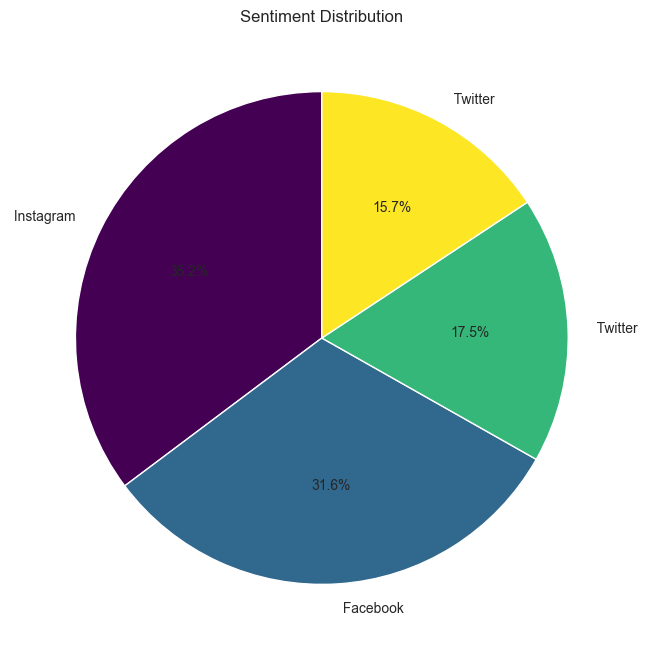

In [117]:
#Platform Distribution (pie)
plt.figure(figsize=(8, 8))
df['Platform'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Sentiment Distribution')
plt.ylabel('') 
plt.show()

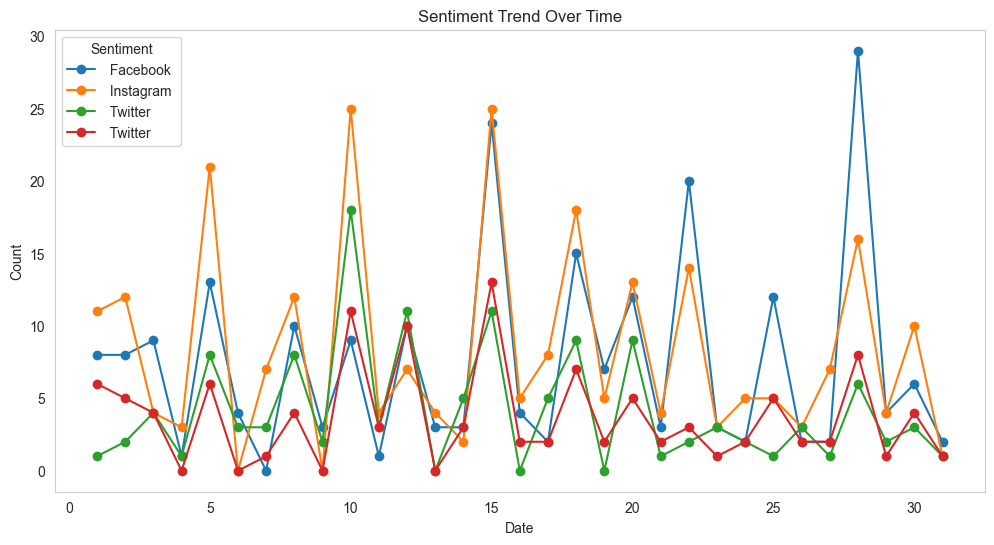

In [118]:
#Date vs Count
sentiment_trend = df.groupby(['Day', 'Platform']).size().unstack().fillna(0)
sentiment_trend.plot(figsize=(12, 6), marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid()
plt.show()

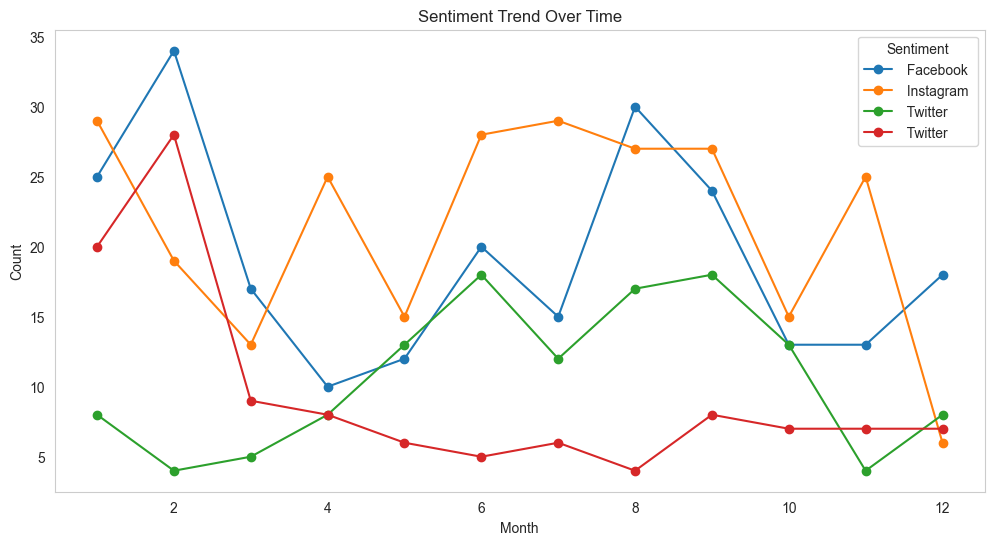

In [119]:
#Month vs Count
sentiment_trend = df.groupby(['Month', 'Platform']).size().unstack().fillna(0)
sentiment_trend.plot(figsize=(12, 6), marker='o')
plt.title('Sentiment Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Sentiment')
plt.grid()
plt.show()